### Скачивание нужных модулей

In [29]:
!python3 -m pip install statsmodels pandas numpy matplotlib sklearn

### Импорт модулей

In [30]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

from statsmodels.stats.diagnostic import het_white
from statsmodels.tools import add_constant
from IPython.display import display
from sklearn.model_selection import train_test_split

### Получение данных

In [31]:
data = pd.read_csv("data_train.csv")
display(data.columns)
display(data)

Index(['id', 'Год. квартал', 'X1(Экспорт в страны вне СНГ млрд. долл.)',
       'X2(Импорт из стран вне СНГ млрд. долл.)',
       'X3(Индекс реальных инвестиций в основной капитал)',
       'X4(Норма безработицы %)', 'X5(Цена за Brent USD)',
       'Y(Индекс реальной зарплаты)'],
      dtype='object')

,id,Год. квартал,X1(Экспорт в страны вне СНГ млрд. долл.),X2(Импорт из стран вне СНГ млрд. долл.),X3(Индекс реальных инвестиций в основной капитал),X4(Норма безработицы %),X5(Цена за Brent USD),Y(Индекс реальной зарплаты)
0,1,2010 I,78.1,38.842,83.9,8.6,76.595000,205.99
1,2,II,81.5,49.584,130.5,7.6,79.335000,216.91
2,3,III,80.5,58.500,152.2,6.7,76.195000,216.26
3,4,IV,93.5,66.300,225.7,6.7,79.691667,236.37
4,5,2011 I,93.1,55.100,87.4,7.4,91.140000,207.30
5,6,II,114.3,70.700,140.6,6.6,114.476667,220.98
6,7,III,109.3,71.400,169.6,6.1,113.890000,222.75
7,8,IV,120.1,76.700,259.5,6.1,108.415000,254.60
8,9,2012 I,111.0,61.900,99.4,6.3,109.873333,227.87
9,10,II,110.9,70.400,155.3,5.5,121.401667,244.27


In [32]:
fixed_data = data[['X1(Экспорт в страны вне СНГ млрд. долл.)',
       'X2(Импорт из стран вне СНГ млрд. долл.)',
       'X3(Индекс реальных инвестиций в основной капитал)',
       'X4(Норма безработицы %)', 'X5(Цена за Brent USD)', 'Y(Индекс реальной зарплаты)']]

In [33]:
fixed_data.corr()

,X1(Экспорт в страны вне СНГ млрд. долл.),X2(Импорт из стран вне СНГ млрд. долл.),X3(Индекс реальных инвестиций в основной капитал),X4(Норма безработицы %),X5(Цена за Brent USD),Y(Индекс реальной зарплаты)
X1(Экспорт в страны вне СНГ млрд. долл.),1.000000,0.722953,0.333825,-0.126841,0.808948,0.260017
X2(Импорт из стран вне СНГ млрд. долл.),0.722953,1.000000,0.418509,-0.194490,0.422090,0.475555
X3(Индекс реальных инвестиций в основной капитал),0.333825,0.418509,1.000000,-0.266094,0.102294,0.449307
X4(Норма безработицы %),-0.126841,-0.194490,-0.266094,1.000000,0.102743,-0.598311
X5(Цена за Brent USD),0.808948,0.422090,0.102294,0.102743,1.000000,-0.265638
Y(Индекс реальной зарплаты),0.260017,0.475555,0.449307,-0.598311,-0.265638,1.000000


In [34]:
X = fixed_data.drop('Y(Индекс реальной зарплаты)', axis=1)
X = add_constant(X)
y = fixed_data['Y(Индекс реальной зарплаты)']

linearModel = sm.OLS(y, X)
fittedLinearModel = linearModel.fit()
display(fittedLinearModel.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Y(Индекс реальной зарплаты)   R-squared:                       0.833
Model:                                     OLS   Adj. R-squared:                  0.812
Method:                          Least Squares   F-statistic:                     40.81
Date:                         Mon, 16 May 2022   Prob (F-statistic):           7.10e-15
Time:                                 20:52:46   Log-Likelihood:                -181.83
No. Observations:                           47   AIC:                             375.7
Df Residuals:                               41   BIC:                             386.8
Df Model:                                    5                                         
Covariance Type:                     nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                               238.1029     19.324     12.321      0.000     199.077     277.129
X1(Экспорт в страны вне СНГ млрд. долл.)              1.5835      0.266      5.944      0.000       1.045       2.121
X2(Импорт из стран вне СНГ млрд. долл.)               0.2217      0.176      1.262      0.214      -0.133       0.576
X3(Индекс реальных инвестиций в основной капитал)     0.0478      0.035      1.357      0.182      -0.023       0.119
X4(Норма безработицы %)                             -10.4632      2.329     -4.492      0.000     -15.167      -5.759
X5(Цена за Brent USD)                                -1.1998      0.141     -8.522      0.000      -1.484      -0.915
==============================================================================
Omnibus:                        0.203   Durbin-Watson:                   1.791
Prob(Omnibus):                  0.904   Jarque-Bera (JB):                0.402
Skew:                           0.070   Prob(JB):                        0.818
Kurtosis:                       2.569   Cond. No.                     2.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
het_test = het_white(fittedLinearModel.resid, fittedLinearModel.model.exog)
# Labels from docs
# Href 
labels = [
    'The lagrange multiplier statistic', 
    'The p-value of lagrange multiplier test', 
    'The f-statistic of the hypothesis that the error variance does not depend on x. This is an alternative test variant not the original LM test',
    'The p-value for the f-statistic'
]
"""
Overview
--------
White’s Lagrange Multiplier Test for Heteroscedasticity.
--------------------------------------------------------
alpha - statistical significance
p - The p-value of lagrange multiplier test
--------------------------------------------------------
H0: p > alpha -> None heteroscedasticity
H1: otherwise -> heteroscedasticity exists
--------------------------------------------------------
"""
display(dict(zip(labels, het_test)))

{'The lagrange multiplier statistic': 32.206797845020105,
 'The p-value of lagrange multiplier test': 0.04114400575111069,
 'The f-statistic of the hypothesis that the error variance does not depend on x. This is an alternative test variant not the original LM test': 2.830275471117771,
 'The p-value for the f-statistic': 0.006828175706120215}

### Создание линейной модели с использованием библиотеки "statsmodels"

In [36]:
X = fixed_data.drop('Y(Индекс реальной зарплаты)', axis=1)
X = add_constant(X)
y = fixed_data['Y(Индекс реальной зарплаты)']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

linearModel = sm.OLS(y_train, X_train)
fittedLinearModel = linearModel.fit()
display(fittedLinearModel.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Y(Индекс реальной зарплаты)   R-squared:                       0.808
Model:                                     OLS   Adj. R-squared:                  0.777
Method:                          Least Squares   F-statistic:                     26.09
Date:                         Mon, 16 May 2022   Prob (F-statistic):           2.98e-10
Time:                                 20:52:46   Log-Likelihood:                -141.18
No. Observations:                           37   AIC:                             294.4
Df Residuals:                               31   BIC:                             304.0
Df Model:                                    5                                         
Covariance Type:                     nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                               232.4624     22.915     10.145      0.000     185.728     279.197
X1(Экспорт в страны вне СНГ млрд. долл.)              1.5979      0.301      5.305      0.000       0.984       2.212
X2(Импорт из стран вне СНГ млрд. долл.)               0.5193      0.215      2.412      0.022       0.080       0.958
X3(Индекс реальных инвестиций в основной капитал)     0.0113      0.040      0.284      0.778      -0.070       0.092
X4(Норма безработицы %)                             -10.3065      2.930     -3.518      0.001     -16.282      -4.331
X5(Цена за Brent USD)                                -1.3019      0.180     -7.232      0.000      -1.669      -0.935
==============================================================================
Omnibus:                        0.815   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.665   Jarque-Bera (JB):                0.880
Skew:                           0.254   Prob(JB):                        0.644
Kurtosis:                       2.440   Cond. No.                     2.54e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### График предсказаний

MSE metric: 271.2090973202145
R2 metric: 0.8059333074298187


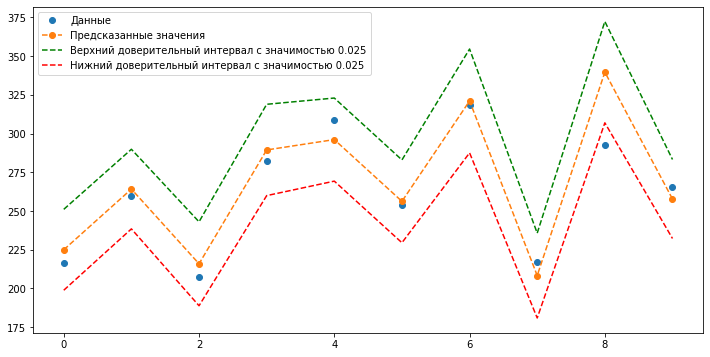

In [37]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

y_test.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

pred_ols = fittedLinearModel.get_prediction(X_test)
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]
predicted_mean = pred_ols.summary_frame()["mean"]

x = [i for i in range(y_test.size)]

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(y_test, "o", label="Данные")
ax.plot(x, predicted_mean, "o--", label="Предсказанные значения")
ax.plot(x, iv_u, "g--", label="Верхний доверительный интервал с значимостью 0.025")
ax.plot(x, iv_l, "r--", label="Нижний доверительный интервал с значимостью 0.025")
ax.legend(loc="best")

print("MSE metric:", mean_squared_error(y_test, predicted_mean))
print("R2 metric:", r2_score(y_test, predicted_mean))

### Проверка гетероскедостичности с помощью Теста Вайта"
<a href ="https://en.wikipedia.org/wiki/White_test#:~:text=In%20statistics%2C%20the%20White%20test,most%20cited%20articles%20in%20economics">White test ENG</a> <br>
<a href="https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D1%81%D1%82_%D0%A3%D0%B0%D0%B9%D1%82%D0%B0#:~:text=%D0%A2%D0%B5%D1%81%D1%82%20%D0%A3%D0%B0%D0%B9%D1%82%D0%B0%20(%D0%B0%D0%BD%D0%B3%D0%BB.%20White%20test),%D0%BF%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%B8%D1%82%D1%8C%20%D0%B3%D0%B5%D1%82%D0%B5%D1%80%D0%BE%D1%81%D0%BA%D0%B5%D0%B4%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%BD%D0%BE%D1%81%D1%82%D1%8C%20%D1%81%D0%BB%D1%83%D1%87%D0%B0%D0%B9%D0%BD%D1%8B%D1%85%20%D0%BE%D1%88%D0%B8%D0%B1%D0%BE%D0%BA%20%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8"> White test RU </a>


In [38]:
het_test = het_white(fittedLinearModel.resid, fittedLinearModel.model.exog)
# Labels from docs
# Href 
labels = [
    'The lagrange multiplier statistic', 
    'The p-value of lagrange multiplier test', 
    'The f-statistic of the hypothesis that the error variance does not depend on x. This is an alternative test variant not the original LM test',
    'The p-value for the f-statistic'
]
"""
Overview
--------
White’s Lagrange Multiplier Test for Heteroscedasticity.
--------------------------------------------------------
alpha - statistical significance
p - The p-value of lagrange multiplier test
--------------------------------------------------------
H0: p > alpha -> None heteroscedasticity
H1: otherwise -> heteroscedasticity exists
--------------------------------------------------------
"""
display(dict(zip(labels, het_test)))

{'The lagrange multiplier statistic': 18.10856359903908,
 'The p-value of lagrange multiplier test': 0.5802567001494696,
 'The f-statistic of the hypothesis that the error variance does not depend on x. This is an alternative test variant not the original LM test': 0.7668475054916621,
 'The p-value for the f-statistic': 0.7161738266643147}

### Методы для устранения гетероскедостичности
1. Weighted least squares <a href="https://en.wikipedia.org/wiki/Weighted_least_squares">link eng</a> <a href="https://translated.turbopages.org/proxy_u/en-ru.ru.7be2f172-62645187-3e62ec93-74722d776562/https/en.wikipedia.org/wiki/Weighted_least_squares">link ru</a>
2. Change params(Removing insignificant parameters)

## Изменение параметров(Удаление не значимых параметров)

### Подготовка данных

In [39]:
new_fixed_data = fixed_data.drop(columns=[
    'X1(Экспорт в страны вне СНГ млрд. долл.)', 
    'X3(Индекс реальных инвестиций в основной капитал)'
])
display(new_fixed_data.corr())

,X2(Импорт из стран вне СНГ млрд. долл.),X4(Норма безработицы %),X5(Цена за Brent USD),Y(Индекс реальной зарплаты)
X2(Импорт из стран вне СНГ млрд. долл.),1.000000,-0.194490,0.422090,0.475555
X4(Норма безработицы %),-0.194490,1.000000,0.102743,-0.598311
X5(Цена за Brent USD),0.422090,0.102743,1.000000,-0.265638
Y(Индекс реальной зарплаты),0.475555,-0.598311,-0.265638,1.000000


### Построение обычной модели наименьших квадратов, без параметров X1, X3

In [153]:
X = new_fixed_data.drop('Y(Индекс реальной зарплаты)', axis=1)
X = add_constant(X)
y = new_fixed_data['Y(Индекс реальной зарплаты)']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

OLSModel = sm.OLS(y_train, X_train)
fittedOLSModel = OLSModel.fit()
display(fittedOLSModel.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Y(Индекс реальной зарплаты)   R-squared:                       0.670
Model:                                     OLS   Adj. R-squared:                  0.640
Method:                          Least Squares   F-statistic:                     22.37
Date:                         Mon, 16 May 2022   Prob (F-statistic):           4.33e-08
Time:                                 22:28:36   Log-Likelihood:                -155.48
No. Observations:                           37   AIC:                             319.0
Df Residuals:                               33   BIC:                             325.4
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                     310.1936     23.169     13.388      0.000     263.055     357.332
X2(Импорт из стран вне СНГ млрд. долл.)     1.2709      0.239      5.308      0.000       0.784       1.758
X4(Норма безработицы %)                   -14.8169      3.316     -4.469      0.000     -21.563      -8.071
X5(Цена за Brent USD)                      -0.6249      0.129     -4.829      0.000      -0.888      -0.362
==============================================================================
Omnibus:                        0.125   Durbin-Watson:                   2.455
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.314
Skew:                          -0.095   Prob(JB):                        0.855
Kurtosis:                       2.590   Cond. No.                         816.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Обычная линейная модель с изменёнными параметрами

MSE metric: 395.95543554314236
R2 metric: 0.5224777589297965


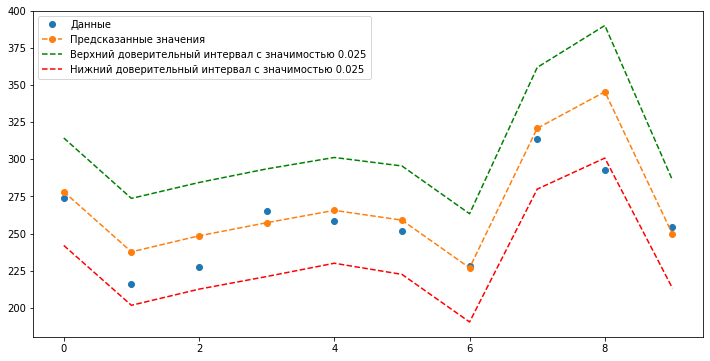

In [155]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

y_test.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

pred_ols = fittedOLSModel.get_prediction(X_test)
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]
predicted_mean = pred_ols.summary_frame()["mean"]

x = [i for i in range(y_test.size)]

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(y_test, "o", label="Данные")
ax.plot(x, predicted_mean, "o--", label="Предсказанные значения")
ax.plot(x, iv_u, "g--", label="Верхний доверительный интервал с значимостью 0.025")
ax.plot(x, iv_l, "r--", label="Нижний доверительный интервал с значимостью 0.025")
ax.legend(loc="best")

print("MSE metric:", mean_squared_error(y_test, predicted_mean))
print("R2 metric:", r2_score(y_test, predicted_mean))

### Check heteroscedasticity

In [156]:
het_test = het_white(fittedOLSModel.resid, fittedOLSModel.model.exog)
# Labels from docs
# Href 
labels = [
    'The lagrange multiplier statistic', 
    'The p-value of lagrange multiplier test', 
    'The f-statistic of the hypothesis that the error variance does not depend on x. This is an alternative test variant not the original LM test',
    'The p-value for the f-statistic'
]
"""
Overview
--------
White’s Lagrange Multiplier Test for Heteroscedasticity.
--------------------------------------------------------
alpha - statistical significance
p - The p-value of lagrange multiplier test
--------------------------------------------------------
H0: p > alpha -> None heteroscedasticity
H1: otherwise -> heteroscedasticity exists
--------------------------------------------------------
Colnslusion
-----------
Heteroscedasticity exists with alpha = 0.05
"""
display(dict(zip(labels, het_test)))

{'The lagrange multiplier statistic': 10.460010562158276,
 'The p-value of lagrange multiplier test': 0.31454307086898353,
 'The f-statistic of the hypothesis that the error variance does not depend on x. This is an alternative test variant not the original LM test': 1.1823679041006696,
 'The p-value for the f-statistic': 0.34510042509567246}

## МВНК с использованием "statsmodels"

### Создание функции зависимости остатков от факторов

In [157]:
# len(X_train)

def get_factors_by_linear_params(X):
    new_df = X.copy()
    factors = new_df.iloc[0].index
    for i in range(1, len(factors)):
        for j in range(i, len(factors)):
            new_df[str(i)+str(j)] = new_df[factors[i]] * new_df[factors[j]]
    return new_df

In [158]:
resid_model = sm.OLS(fittedOLSModel.resid**2, get_factors_by_linear_params(X_train))
fitted_resid_model = resid_model.fit()
fitted_resid_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     1.182
Date:                Mon, 16 May 2022   Prob (F-statistic):              0.345
Time:                        22:30:48   Log-Likelihood:                -260.90
No. Observations:                  37   AIC:                             541.8
Df Residuals:                      27   BIC:                             557.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                    3632.8557   7252.143      0.501      0.620   -1.12e+04    1.85e+04
X2(Импорт из стран вне СНГ млрд. долл.)    66.9417     84.175      0.795      0.433    -105.771     239.655
X4(Норма безработицы %)                 -1029.6910   1746.036     -0.590      0.560   -4612.262    2552.880
X5(Цена за Brent USD)                     -58.2374     41.915     -1.389      0.176    -144.241      27.766
11                                         -0.3741      0.302     -1.238      0.227      -0.994       0.246
12                                         -5.4901     12.353     -0.444      0.660     -30.836      19.856
13                                          0.2578      0.316      0.815      0.422      -0.391       0.907
22                                         91.8314    114.311      0.803      0.429    -142.715     326.378
23                                          2.3667      6.629      0.357      0.724     -11.235      15.968
33                                          0.1350      0.167      0.810      0.425      -0.207       0.477
==============================================================================
Omnibus:                        6.229   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                4.922
Skew:                           0.853   Prob(JB):                       0.0853
Kurtosis:                       3.534   Cond. No.                     1.35e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [159]:
# nsample = y.size
arr_for_resid = get_factors_by_linear_params(X_train)
w = np.abs(fitted_resid_model.get_prediction(arr_for_resid).summary_frame()["mean"])
wls_model = sm.WLS(y_train, X_train, weights=1./w)
fittedWLSModel = wls_model.fit()
display(fittedWLSModel.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 WLS Regression Results                                
=======================================================================================
Dep. Variable:     Y(Индекс реальной зарплаты)   R-squared:                       0.805
Model:                                     WLS   Adj. R-squared:                  0.787
Method:                          Least Squares   F-statistic:                     45.30
Date:                         Mon, 16 May 2022   Prob (F-statistic):           8.44e-12
Time:                                 22:35:48   Log-Likelihood:                -150.02
No. Observations:                           37   AIC:                             308.0
Df Residuals:                               33   BIC:                             314.5
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                     319.5686     17.916     17.837      0.000     283.117     356.020
X2(Импорт из стран вне СНГ млрд. долл.)     1.3043      0.158      8.253      0.000       0.983       1.626
X4(Норма безработицы %)                   -17.1919      2.565     -6.703      0.000     -22.410     -11.974
X5(Цена за Brent USD)                      -0.6036      0.087     -6.916      0.000      -0.781      -0.426
==============================================================================
Omnibus:                        2.696   Durbin-Watson:                   2.310
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.461
Skew:                          -0.143   Prob(JB):                        0.482
Kurtosis:                       2.069   Cond. No.                         962.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MSE metric: 266.8259867193709
R2 metric: 0.663752764368184


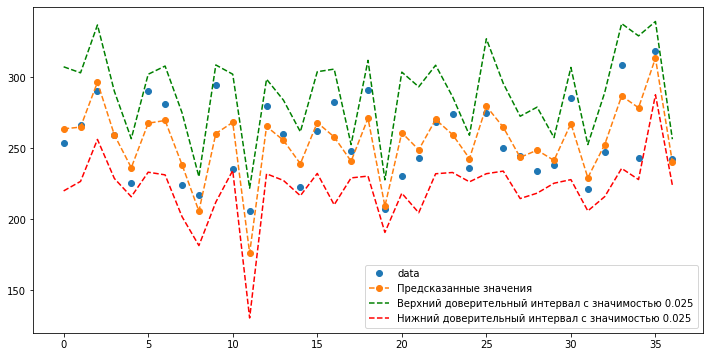

In [161]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

y_train.reset_index(drop=True, inplace=True)
X_train.reset_index(drop=True, inplace=True)

pred_ols = fittedWLSModel.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]
predicted_mean = pred_ols.summary_frame()["mean"]

x = [i for i in range(y_train.size)]

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(y_train, "o", label="data")
ax.plot(x, predicted_mean, "o--", label="Предсказанные значения")
ax.plot(x, iv_u, "g--", label="Верхний доверительный интервал с значимостью 0.025")
ax.plot(x, iv_l, "r--", label="Нижний доверительный интервал с значимостью 0.025")
ax.legend(loc="best")

print("MSE metric:", mean_squared_error(y_train, predicted_mean))
print("R2 metric:", r2_score(y_train, predicted_mean))

In [162]:
het_test = het_white(fittedWLSModel.resid, fittedWLSModel.model.exog)
# Labels from docs
# Href 
labels = [
    'The lagrange multiplier statistic', 
    'The p-value of lagrange multiplier test', 
    'The f-statistic of the hypothesis that the error variance does not depend on x. This is an alternative test variant not the original LM test',
    'The p-value for the f-statistic'
]
"""
Overview
--------
White’s Lagrange Multiplier Test for Heteroscedasticity.
--------------------------------------------------------
alpha - statistical significance
p - The p-value of lagrange multiplier test
--------------------------------------------------------
H0: p > alpha -> None heteroscedasticity
H1: otherwise -> heteroscedasticity exists
--------------------------------------------------------
"""
display(dict(zip(labels, het_test)))

{'The lagrange multiplier statistic': 12.054268119546018,
 'The p-value of lagrange multiplier test': 0.2102671935560146,
 'The f-statistic of the hypothesis that the error variance does not depend on x. This is an alternative test variant not the original LM test': 1.4496589850295438,
 'The p-value for the f-statistic': 0.21690124804930458}

### МВНК график с предсказаниями и доверительными интервалами

MSE metric: 434.38815807956735
R2 metric: 0.476127896928664


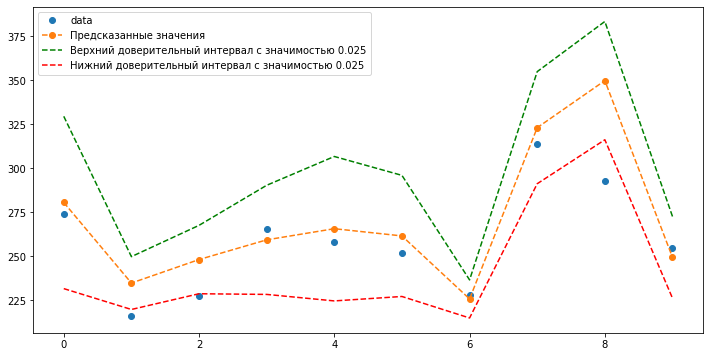

In [163]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

y_test.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
arr_for_resid = get_factors_by_linear_params(X_test)
weights = np.abs(fitted_resid_model.get_prediction(arr_for_resid).summary_frame()["mean"])

# weights


pred_ols = fittedWLSModel.get_prediction(X_test, weights=1./weights)
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]
predicted_mean = pred_ols.summary_frame()["mean"]

x = [i for i in range(y_test.size)]

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(y_test, "o", label="data")
ax.plot(x, predicted_mean, "o--", label="Предсказанные значения")
ax.plot(x, iv_u, "g--", label="Верхний доверительный интервал с значимостью 0.025")
ax.plot(x, iv_l, "r--", label="Нижний доверительный интервал с значимостью 0.025")
ax.legend(loc="best")

print("MSE metric:", mean_squared_error(y_test, predicted_mean))
print("R2 metric:", r2_score(y_test, predicted_mean))

### Тест Вайта

In [138]:
het_test = het_white(fittedWLSModel.resid, fittedWLSModel.model.exog)
# Labels from docs
# Href 
labels = [
    'The lagrange multiplier statistic', 
    'The p-value of lagrange multiplier test', 
    'The f-statistic of the hypothesis that the error variance does not depend on x. This is an alternative test variant not the original LM test',
    'The p-value for the f-statistic'
]
"""
Overview
--------
White’s Lagrange Multiplier Test for Heteroscedasticity.
--------------------------------------------------------
alpha - statistical significance
p - The p-value of lagrange multiplier test
--------------------------------------------------------
H0: p > alpha -> None heteroscedasticity
H1: otherwise -> heteroscedasticity exists
--------------------------------------------------------
Colnslusion
-----------
None heteroscedasticity with alpha = 0.05
"""
display(dict(zip(labels, het_test)))

{'The lagrange multiplier statistic': 7.818101293697259,
 'The p-value of lagrange multiplier test': 0.5525762270591772,
 'The f-statistic of the hypothesis that the error variance does not depend on x. This is an alternative test variant not the original LM test': 0.8037278217275867,
 'The p-value for the f-statistic': 0.6164848292399684}